In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df=df.replace({'Glucose':0,'BloodPressure':0,'SkinThickness':0,'Insulin':0,'BMI':0,'DiabetesPedigreeFunction':0,'Age':0},np.NaN)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


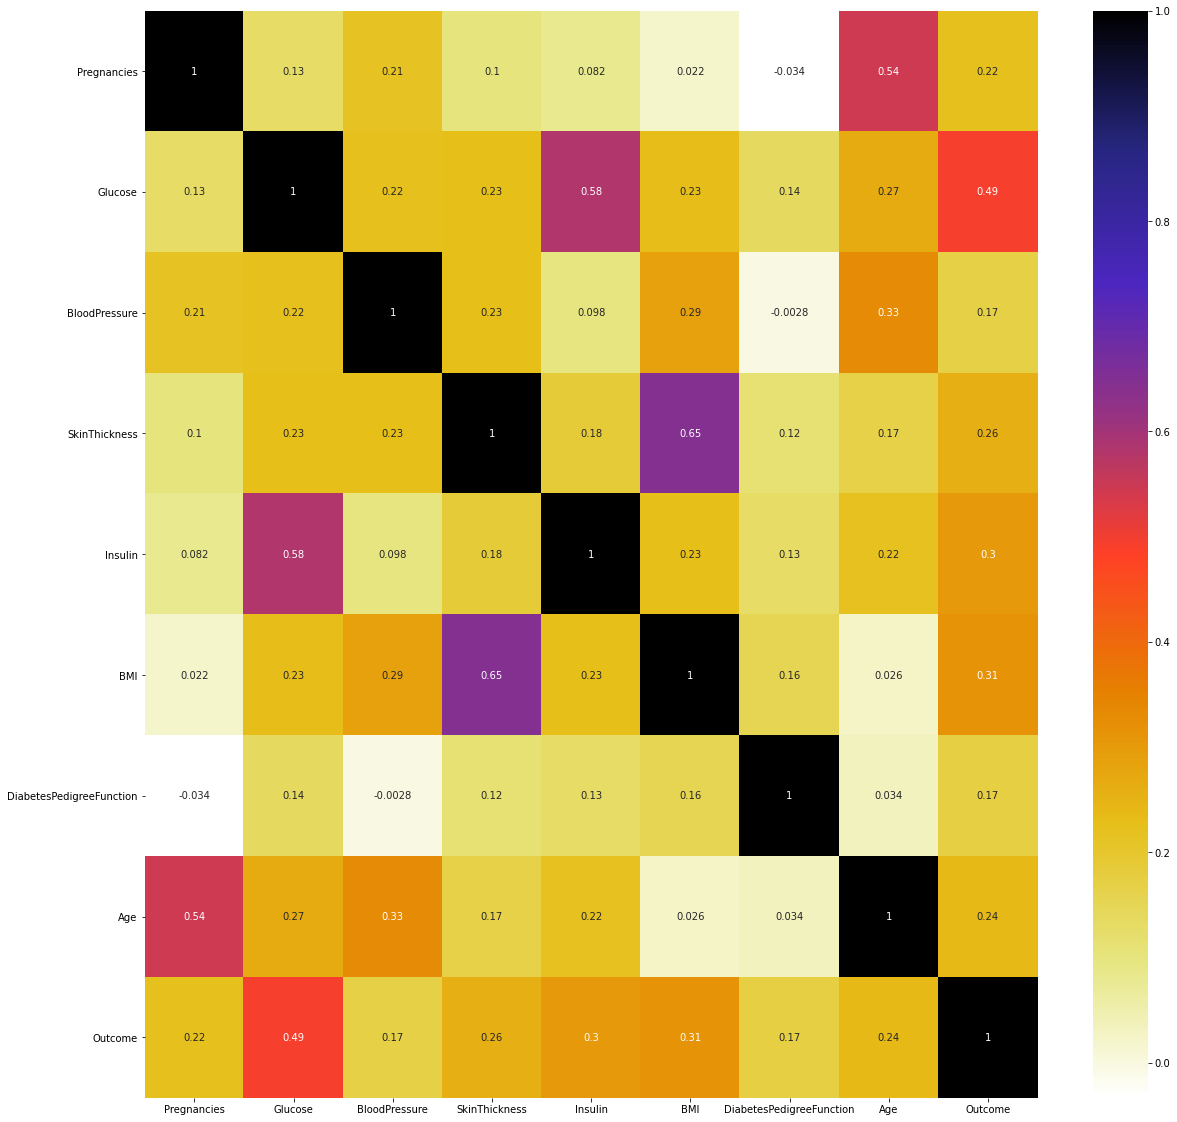

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
corelation=df.corr()
sns.heatmap(corelation,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df=df.dropna(subset=['Glucose','BloodPressure','BMI'])

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
x=df.iloc[:,0:8].values

pd.isnull(x).sum()

524

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it=IterativeImputer(random_state=0)
x=impute_it.fit_transform(x)

In [ ]:
pd.isnull(x).sum()

0

In [ ]:
y=df.iloc[:,8].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
z_test=sc.fit_transform(x_test)
z_train=sc.fit_transform(x_train)

In [ ]:
x_train

array([[2.00e+00, 1.10e+02, 7.40e+01, ..., 3.24e+01, 6.98e-01, 2.70e+01],
       [9.00e+00, 1.52e+02, 7.80e+01, ..., 3.42e+01, 8.93e-01, 3.30e+01],
       [0.00e+00, 1.04e+02, 6.40e+01, ..., 2.78e+01, 4.54e-01, 2.30e+01],
       ...,
       [9.00e+00, 1.54e+02, 7.80e+01, ..., 3.09e+01, 1.64e-01, 4.50e+01],
       [0.00e+00, 1.88e+02, 8.20e+01, ..., 3.20e+01, 6.82e-01, 2.20e+01],
       [2.00e+00, 1.75e+02, 8.80e+01, ..., 2.29e+01, 3.26e-01, 2.20e+01]])

In [ ]:
z_train

array([[-0.51818919, -0.34474938,  0.1261874 , ..., -0.00242439,
         0.68966995, -0.5073934 ],
       [ 1.57940093,  1.02571504,  0.4478764 , ...,  0.25797125,
         1.28165665,  0.01873254],
       [-1.11750066, -0.54053001, -0.6780351 , ..., -0.66787993,
        -0.05107238, -0.85814402],
       ...,
       [ 1.57940093,  1.09097525,  0.4478764 , ..., -0.21942076,
        -0.93146285,  1.07098441],
       [-1.11750066,  2.20039884,  0.76956539, ..., -0.06029009,
         0.64109668, -0.94583167],
       [-0.51818919,  1.77620747,  1.25209889, ..., -1.37673475,
        -0.43965851, -0.94583167]])

### knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn=KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_predict=knn.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test,y_predict)

array([[95, 26],
       [26, 34]])

In [ ]:
accuracy_score(y_test,y_predict)

0.712707182320442

In [ ]:
knnz=KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knnz.fit(z_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_predictz=knnz.predict(z_test)

In [ ]:
confusion_matrix(y_test,y_predictz)

array([[97, 24],
       [27, 33]])

In [ ]:
accuracy_score(y_test,y_predictz)

0.7182320441988951

### dtc

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(z_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_predict_dtc=dtc.predict(z_test)

In [ ]:
confusion_matrix(y_test,y_predict_dtc)
accuracy_score(y_test,y_predict_dtc)

0.6961325966850829

In [ ]:
dtcx=DecisionTreeClassifier(random_state=0)
dtcx.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_predict_dtcx=dtcx.predict(z_test)

In [ ]:
accuracy_score(y_test,y_predict_dtcx)

0.6408839779005525

### random forest

In [ ]:
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=0)

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rfc = rfc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_rfc)

0.7292817679558011

In [ ]:
rfcz = RandomForestClassifier(random_state=0)
rfcz.fit(z_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rfcz = rfc.predict(z_test)

In [ ]:
accuracy_score(y_test,y_pred_rfcz)

0.6685082872928176

### `XGBoost Rainforest`

In [ ]:
import xgboost

In [ ]:
classifier=xgboost.XGBRFClassifier()
xgrf=classifier.fit(x_train, y_train)


In [ ]:
y_pred_xgrf = xgrf.predict(x_test)
accuracy_score(y_test,y_pred_xgrf)

0.7513812154696132

In [ ]:
xgrfz=classifier.fit(z_train, y_train)
y_pred_xgrfz = xgrfz.predict(z_test)
accuracy_score(y_test,y_pred_xgrfz)

0.7513812154696132

### Random search on XGBRF model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
str={
    'learning_rate' :[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,8,10,12,15,None],
              'n_estimators':[10,100,200,300,400,500],
               'verbosity':[0,1,2],
               'min_child_weight':[1,3,5,7],
               'gamma':[0.0,0.1,0.2,0.3,0.4],
               'colsample_bytree':[0.3,0.4,0.5,0.7],
}

In [ ]:
rs=RandomizedSearchCV(xgrf,param_distributions=str,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
rs.fit(x_train,y_train)
rs_bestparam=rs.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished


In [ ]:
rs.best_score_

0.8429224565028866

In [ ]:
rs_bestparam

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100,
 'verbosity': 1}

In [ ]:
best=xgboost.XGBRFClassifier(colsample_bytree=0.5,
 gamma=0.0,
 learning_rate=0.1,
 max_depth=3,
 min_child_weight=1,
 n_estimators=100,
 verbosity=1)
best_model=best.fit(x_train, y_train)
y_pred_best = best_model.predict(x_test)
accuracy_score(y_test,y_pred_best)

0.7734806629834254

In [ ]:
bestz=xgboost.XGBRFClassifier(colsample_bytree=0.5,
 gamma=0.0,
 learning_rate=0.1,
 max_depth=3,
 min_child_weight=1,
 n_estimators=100,
 verbosity=1)
best_modelz=bestz.fit(z_train, y_train)
y_pred_bestz = best_modelz.predict(z_test)
accuracy_score(y_test,y_pred_bestz)

0.7734806629834254